# Introduction

With the goal of making a predictive model of accident severity in an area a model based on weather related driving conditions is developed.

# Data

In order to have a simple and clear understanding in this exploration and to have simple and general but effective measures for climate conditions only easily perceived variables will be used for the model, such as weather, road condition and light condition. 

# Methodology

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
LINK="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df=pd.read_csv(LINK)

C:\Users\mecat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import tree

In [4]:
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [5]:
df=df.loc[:,['WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','UNDERINFL','SEVERITYCODE']]
df

,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,UNDERINFL,SEVERITYCODE
0,Overcast,Wet,Daylight,At Intersection (intersection related),N,2
1,Raining,Wet,Dark - Street Lights On,Mid-Block (not related to intersection),0,1
2,Overcast,Dry,Daylight,Mid-Block (not related to intersection),0,1
3,Clear,Dry,Daylight,Mid-Block (not related to intersection),N,1
4,Raining,Wet,Daylight,At Intersection (intersection related),0,2
...,...,...,...,...,...,...
194668,Clear,Dry,Daylight,Mid-Block (not related to intersection),N,2
194669,Raining,Wet,Daylight,Mid-Block (not related to intersection),N,1
194670,Clear,Dry,Daylight,At Intersection (intersection related),N,2
194671,Clear,Dry,Dusk,At Intersection (intersection related),N,2


In [6]:
df.dropna(axis='rows',inplace=True)
df

,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,UNDERINFL,SEVERITYCODE
0,Overcast,Wet,Daylight,At Intersection (intersection related),N,2
1,Raining,Wet,Dark - Street Lights On,Mid-Block (not related to intersection),0,1
2,Overcast,Dry,Daylight,Mid-Block (not related to intersection),0,1
3,Clear,Dry,Daylight,Mid-Block (not related to intersection),N,1
4,Raining,Wet,Daylight,At Intersection (intersection related),0,2
...,...,...,...,...,...,...
194668,Clear,Dry,Daylight,Mid-Block (not related to intersection),N,2
194669,Raining,Wet,Daylight,Mid-Block (not related to intersection),N,1
194670,Clear,Dry,Daylight,At Intersection (intersection related),N,2
194671,Clear,Dry,Dusk,At Intersection (intersection related),N,2


In [7]:
from sklearn.utils import shuffle
df = shuffle(df,random_state=0)
df=df.sort_values(by=['SEVERITYCODE'])
df.reset_index(inplace = True)
df['SEVERITYCODE'].value_counts()

1    126527
2     56669
Name: SEVERITYCODE, dtype: int64

In [8]:
df=df.iloc[126527-56669:,:]
df.reset_index(inplace = True)

In [9]:
df['SEVERITYCODE'].value_counts()

2    56669
1    56669
Name: SEVERITYCODE, dtype: int64

In [10]:
X=df.loc[:,['WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','UNDERINFL']]
y=df.loc[:,'SEVERITYCODE']
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [40]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train)
X1=enc.transform(X_train)
clf=tree.DecisionTreeClassifier(random_state=42,max_depth=2)
clf.fit(X1,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [41]:
X1=pd.DataFrame(X1.todense())
enc.get_feature_names()
X1.columns = enc.get_feature_names()

In [42]:
X1

,x0_Blowing Sand/Dirt,x0_Clear,x0_Fog/Smog/Smoke,x0_Other,x0_Overcast,x0_Partly Cloudy,x0_Raining,x0_Severe Crosswind,x0_Sleet/Hail/Freezing Rain,x0_Snowing,...,x3_At Intersection (intersection related),x3_Driveway Junction,x3_Mid-Block (but intersection related),x3_Mid-Block (not related to intersection),x3_Ramp Junction,x3_Unknown,x4_0,x4_1,x4_N,x4_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90665,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
90666,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
90667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
90668,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
# Preprocessing of validation data, get predictions 
preds=clf.predict(enc.transform(X_val))

# Results

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           1       0.61      0.53      0.57     11184
           2       0.59      0.66      0.63     11484

    accuracy                           0.60     22668
   macro avg       0.60      0.60      0.60     22668
weighted avg       0.60      0.60      0.60     22668



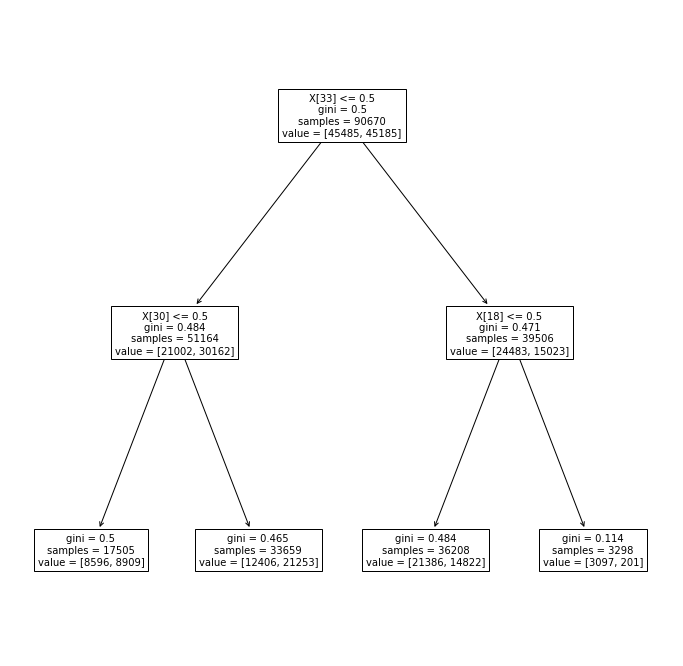

In [45]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [46]:
X1.columns[33]

'x3_Mid-Block (not related to intersection)'

In [47]:
X1.columns[30]

'x3_At Intersection (intersection related)'

In [48]:
X1.columns[18]

'x1_Unknown'